In [38]:
#用已经训练好的 3.3.1模型 对图片进行预测
import keras
import numpy as np
import scipy.misc
from keras.models import model_from_json
from keras.models import load_model
from keras.optimizers import SGD
import skimage
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [29]:
#加载模型  已经训练好的 3.3.1模型
model_architecture = './cifar10_architecture.json'  #json地址和文件名
model_weights = './cifar10_weights.h5'     #h5地址和文件名
print(model_architecture)
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)
# model.load_weights('./cifar10_weights.h5')
model.summary()

./cifar10_architecture.json
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)         

In [32]:
#加载图片
filename=r'G:\Keras\11.jpg' 
test_img=skimage.io.imread(filename)
test_img=skimage.transform.resize(test_img,(32,32,3))
test_img=np.expand_dims(test_img,0)
print(test_img)

[[[[0.30588235 0.0745098  0.01176471]
   [0.30980392 0.07058824 0.00784314]
   [0.30980392 0.07264285 0.01568627]
   ...
   [0.34509804 0.11372549 0.03615196]
   [0.35294118 0.1185049  0.04313725]
   [0.36078431 0.12634804 0.05569278]]

  [[0.30588235 0.0745098  0.01176471]
   [0.31072304 0.07843137 0.01568627]
   [0.31372549 0.08627451 0.02662952]
   ...
   [0.3641793  0.15686275 0.0627451 ]
   [0.36862745 0.16727941 0.07027229]
   [0.37647059 0.17904412 0.0745098 ]]

  [[0.31764706 0.08627451 0.02352941]
   [0.3254902  0.08627451 0.02745098]
   [0.32802351 0.09019608 0.02745098]
   ...
   [0.38823529 0.20036765 0.09019608]
   [0.39215686 0.21176471 0.09803922]
   [0.39607843 0.21960784 0.10232843]]

  ...

  [[0.77227137 0.73302696 0.66636029]
   [0.74025735 0.68936313 0.62297794]
   [0.71764706 0.65904756 0.58670343]
   ...
   [0.53116766 0.45273629 0.37647059]
   [0.49148284 0.4129653  0.34237707]
   [0.45554726 0.3807598  0.31044922]]

  [[0.74901961 0.71217639 0.64675245]
   [0.7

In [33]:
#训练
optim= SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim, 
              metrics=['accuracy'])

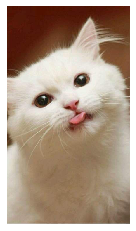

In [42]:
# PLT 用于读取、显示图片
# im = Image.open('11.jpg')
# im.show()
lena = mpimg.imread('11.jpg')
plt.imshow(lena) 
plt.axis('off')
plt.show()

In [43]:
#预测  结果是3 识别为猫
predictions = model.predict_classes(test_img)
print(predictions)

[3]
